In [188]:
import pandas as pd
import numpy as np

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [190]:
#Reading the titanic train data
train = pd.read_csv('C:/Users/IT/Desktop/Machine Learning/titanic_train.csv')

In [191]:
#Checking the head of the dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Explanatory Analysis

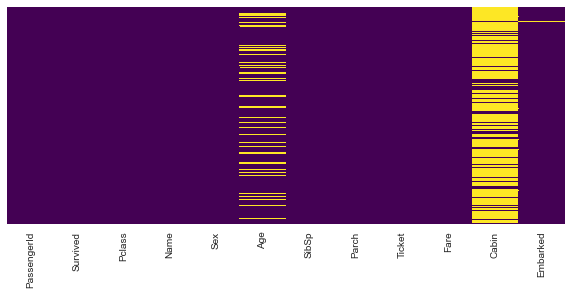

In [192]:
#Checking for missing data-
plt.figure(figsize=(10,4))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [193]:
#This would indicate how the style of the grid would look
sns.set_style('whitegrid')

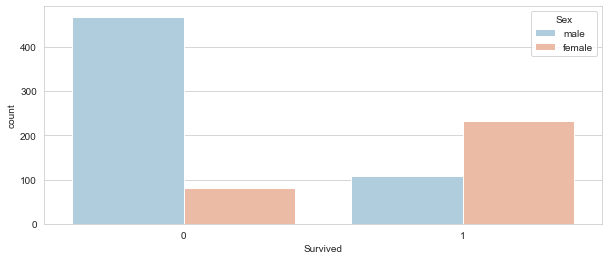

In [194]:
#Visualizing the peopel that survived and their gender
plt.figure(figsize=(10,4))
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
plt.show()

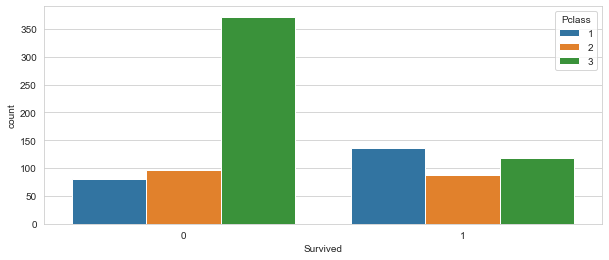

In [195]:
#showing the classes of people that survived
plt.figure(figsize=(10,4))
sns.countplot(x='Survived',hue='Pclass',data=train)
plt.show()

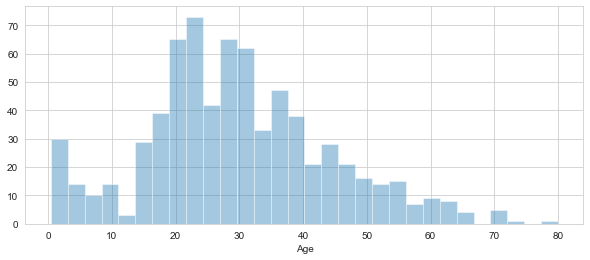

In [196]:
#Checking the ages of people that are on the ship
plt.figure(figsize=(10,4))
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
plt.show()

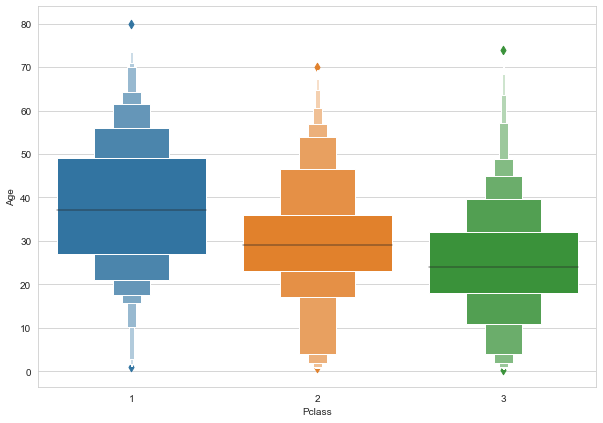

In [197]:
#Checking for the AGE categories in each CLASSES
plt.figure(figsize=(10,7))
sns.boxenplot(x='Pclass',y='Age',data=train)
plt.show()

In [198]:
"""
Creating a function that would check for AGE based on the Pclass
It would return the average of the Ages in each class--shown in the above BOXPLOT

"""
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [199]:
#Applying the fill_age function to the new AGE column
train['Age'] = train[['Age','Pclass']].apply(fill_age,axis=1)

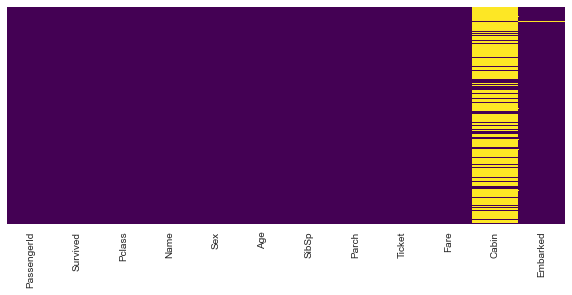

In [200]:
#Using a heatmap to check if the Missing data in Age has been filled in
plt.figure(figsize=(10,4))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [201]:
#Due to the high number of missing data in Cabin, I will drop the column 
train.drop('Cabin',inplace=True,axis=1)

In [202]:
#Checking to see if the Cabin column as been dropped
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [203]:
train.dropna(inplace=True)

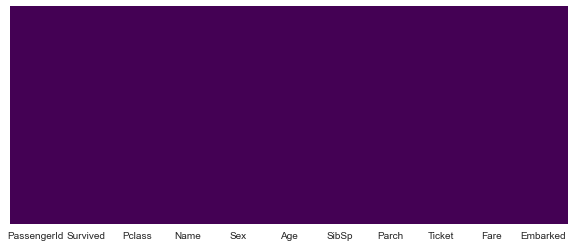

In [204]:
#Checking to see if the Train Table has been cleared of missing data
plt.figure(figsize=(10,4))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [205]:
"""
Creating dummy variable for categorical colums "Sex","Embarked"
It has to me encoded in a way the  machine learning understands
"""
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark= pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train,sex,embark],axis=1)

In [206]:
train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1


In [207]:
#Dropping colums that won't be useful for the MLA
train.drop(['Sex','Name','Embarked','Ticket'],axis=1,inplace=True)

In [208]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [209]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [210]:
#Spliting out data into train and plit 
X = train.drop(['Survived'],axis=1)
y= train['Survived']

In [211]:
from sklearn.model_selection import train_test_split 

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
logmodel = LogisticRegression()

In [215]:
logmodel.fit(X_train,y_train)

c:\users\it\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
predictions = logmodel.predict(X_test)

In [217]:
from sklearn.metrics import classification_report

In [218]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [219]:
from sklearn.metrics import confusion_matrix

In [220]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)